## Airline Passenger Satisfaction — Capstone Data Analysis

### Research question
Are seat comfort, inflight service, cleanliness, and on-time performance statistically associated with airline passenger satisfaction?

### Dataset used
Dataset: Airline Passenger Satisfaction (Kaggle).

### Analytical approach (descriptive + diagnostic + chi-square)
This analysis supports airline decision-making by identifying which service quality factors are most strongly associated with passenger satisfaction.

### Hypothesis
There is a statistically significant association between airline passenger satisfaction
and selected service quality attributes.


#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import scipy


pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 120)

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [1]:
print("Python:", sys.version.split()[0])
print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("scipy:", scipy.__version__)
print("matplotlib:", matplotlib.__version__)
print("seaborn:", sns.__version__)


Python: 3.13.5
pandas: 2.2.3
numpy: 2.1.3
scipy: 1.15.3
matplotlib: 3.10.0
seaborn: 0.13.2


## 2. Data Loading

##### The dataset was loaded from a compressed ZIP archive provided by Kaggle. Only the `train.csv` file was extracted and used for analysis.


In [2]:

import csv
import zipfile
#FILL IN 1st data gathering and loading method
zip_path = r"C:\Users\Nage Murphy\Desktop\WGU_HMWK\WGU_502\archive.zip"

# Open the zip file
with zipfile.ZipFile(zip_path, 'r') as z:
    # List files inside the ZIP (helpful for debugging)
    #print(z.namelist())
    
    # Extract only the airline.csv file
    with z.open("train.csv") as f:
        airline = pd.read_csv(f, low_memory=False)

        
df = airline
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


## 3. Data Understanding

- The dataset contains survey responses related to airline passenger experiences.
- The target variable is `satisfaction`, which has two categories: Satisfied and Neutral or Dissatisfied.
- Service quality variables are measured on a 1–5 ordinal scale.
- The dataset includes demographic, travel, service quality, and delay-related variables.


In [3]:
# Display the number of rows and columns in the dataset
rows, cols = df.shape
print(f"The dataset contains {rows:,} rows and {cols} columns.")

The dataset contains 103,904 rows and 25 columns.


In [4]:
# Display the distribution of the target variable (satisfaction)
satisfaction_counts = df['satisfaction'].value_counts()

print("Distribution of passenger satisfaction:")
for category, count in satisfaction_counts.items():
    print(f"  {category}: {count:,} passengers")


Distribution of passenger satisfaction:
  neutral or dissatisfied: 58,879 passengers
  satisfied: 45,025 passengers


In [5]:
# Calculate and display satisfaction percentages
satisfaction_percent = df['satisfaction'].value_counts(normalize=True) * 100

print("\nPercentage distribution of passenger satisfaction:")
for category, pct in satisfaction_percent.items():
    print(f"  {category}: {pct:.2f}%")


Percentage distribution of passenger satisfaction:
  neutral or dissatisfied: 56.67%
  satisfied: 43.33%


### 3.1 Key Variables for Analysis

The following variables were selected for analysis based on their relevance to airline passenger satisfaction and alignment with the research question:

- **satisfaction**: Target variable indicating whether a passenger is satisfied or neutral/dissatisfied.
- **Seat comfort**: Passenger rating of seat comfort on a 1–5 ordinal scale.
- **Inflight service**: Passenger rating of inflight service quality on a 1–5 ordinal scale.
- **Cleanliness**: Passenger rating of aircraft cleanliness on a 1–5 ordinal scale.
- **Departure/Arrival time convenient**: Passenger rating of schedule convenience on a 1–5 ordinal scale.

These service quality variables will be analyzed descriptively and tested for statistical association with passenger satisfaction using a chi-square test of independence.


In [6]:
# Display summary information for selected analysis variables
analysis_columns = [
    'satisfaction',
    'Seat comfort',
    'Inflight service',
    'Cleanliness',
    'Departure/Arrival time convenient',	
    'Gender',	
    'Customer Type',	
    'Class'

]

df[analysis_columns].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 8 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   satisfaction                       103904 non-null  object
 1   Seat comfort                       103904 non-null  int64 
 2   Inflight service                   103904 non-null  int64 
 3   Cleanliness                        103904 non-null  int64 
 4   Departure/Arrival time convenient  103904 non-null  int64 
 5   Gender                             103904 non-null  object
 6   Customer Type                      103904 non-null  object
 7   Class                              103904 non-null  object
dtypes: int64(4), object(4)
memory usage: 6.3+ MB


#### The values range from 0-5 on level of satisfaction for service quality variables that will be used for Analysis such as seat comfort, inflight service, cleanliness, and on-time performance
##### Also added potential columns to check out

In [7]:
# Display value counts for service quality variables
for col in analysis_columns[1:]:
    print(f"\nValue distribution for {col}:")
    print(df[col].value_counts().sort_index())



Value distribution for Seat comfort:
Seat comfort
0        1
1    12075
2    14897
3    18696
4    31765
5    26470
Name: count, dtype: int64

Value distribution for Inflight service:
Inflight service
0        3
1     7084
2    11457
3    20299
4    37945
5    27116
Name: count, dtype: int64

Value distribution for Cleanliness:
Cleanliness
0       12
1    13318
2    16132
3    24574
4    27179
5    22689
Name: count, dtype: int64

Value distribution for Departure/Arrival time convenient:
Departure/Arrival time convenient
0     5300
1    15498
2    17191
3    17966
4    25546
5    22403
Name: count, dtype: int64

Value distribution for Gender:
Gender
Female    52727
Male      51177
Name: count, dtype: int64

Value distribution for Customer Type:
Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64

Value distribution for Class:
Class
Business    49665
Eco         46745
Eco Plus     7494
Name: count, dtype: int64


## 4. Data Quality Assessment

This section reviews missing data, duplicate records, and any columns that should be removed prior to analysis.


In [8]:
# Check for missing values across the dataset
df.isnull().sum().sort_values(ascending=False)


Arrival Delay in Minutes             310
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Unnamed: 0                             0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Gate location                          0
Ease of Online booking                 0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
Food and drink                         0
On-board service                       0
Leg room service                       0
Checkin service                        0
Baggage handling                       0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
satisfaction    

In [9]:
# Check for duplicate rows in the dataset
duplicate_rows = df.duplicated().sum()

print(f"Number of duplicate rows: {duplicate_rows:,}")


Number of duplicate rows: 0


#### Findings
Only one column, **Arrival Delay in Minutes**, contains missing values (310 records).  
This column is not used in the statistical analysis for this project, which focuses on service quality ratings and passenger satisfaction.  
Therefore, the missing values do not impact the validity of the analysis.


All variables used in the analysis (satisfaction, seat comfort, inflight service, cleanliness, and departure/arrival time convenience) contain complete data with no missing values.  
This supports the reliability of the descriptive analysis and chi-square statistical testing.


## 5. Data Preparation


In [10]:
# Create a copy of the original dataset for analysis
df_clean = df.copy()

print("Clean working dataset created.")
df_clean.head()

Clean working dataset created.


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [11]:
# Columns not required for this analysis
columns_to_drop = [
    'Unnamed: 0',
   # 'id',
   # 'Gender',
   # 'Customer Type',
    'Age',
    'Type of Travel',
   # 'Class',
    'Flight Distance',
    'Inflight wifi service',
    'Ease of Online booking',
    'Gate location',
    'Food and drink',
    'Online boarding',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Departure Delay in Minutes',
    'Arrival Delay in Minutes'
]

# Drop columns that exist in the dataset
df_clean.drop(
    columns=[col for col in columns_to_drop if col in df_clean.columns],
    inplace=True
)

print(f"Dropped {len(columns_to_drop)} non-analytical columns.")


Dropped 16 non-analytical columns.


In [12]:
# Display remaining columns after cleaning
print("Remaining columns used for analysis:")
display(df_clean.columns.to_list())


Remaining columns used for analysis:


['id',
 'Gender',
 'Customer Type',
 'Class',
 'Departure/Arrival time convenient',
 'Seat comfort',
 'Inflight service',
 'Cleanliness',
 'satisfaction']

In [13]:
rows, cols = df_clean.shape
print(f"Dataset shape after column removal: {rows:,} rows and {cols} columns.")


Dataset shape after column removal: 103,904 rows and 9 columns.


In [14]:
df_clean.head()

,id,Gender,Customer Type,Class,Departure/Arrival time convenient,Seat comfort,Inflight service,Cleanliness,satisfaction
0,70172,Male,Loyal Customer,Eco Plus,4,5,5,5,neutral or dissatisfied
1,5047,Male,disloyal Customer,Business,2,1,4,1,neutral or dissatisfied
2,110028,Female,Loyal Customer,Business,2,5,4,5,satisfied
3,24026,Female,Loyal Customer,Business,5,2,4,2,neutral or dissatisfied
4,119299,Male,Loyal Customer,Business,3,5,3,3,satisfied


### Justification
After data preparation, the dataset contains only the target variable and service quality variables required for the descriptive analysis or chi-square statistical testing.
All removed columns were unrelated to the research question and statistical testing approach.
No records were removed during this process. I also kept a few related columns that could be used for further analysis outside my research scope.



## 6. Target Variable Definition

The target variable for this analysis is **satisfaction**, which represents overall airline passenger satisfaction.
The variable contains two categories: *satisfied* and *neutral or dissatisfied*.
This categorical structure makes the variable appropriate for use in a chi-square test of independence.


In [15]:
# Verify unique values of the target variable
print("Unique values in the satisfaction column:")
display(df_clean['satisfaction'].unique())


Unique values in the satisfaction column:


array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [16]:
# Display distribution of the target variable after data preparation
satisfaction_counts = df_clean['satisfaction'].value_counts()

print("Distribution of passenger satisfaction (clean dataset):")
for category, count in satisfaction_counts.items():
    print(f"  {category}: {count:,} passengers")


Distribution of passenger satisfaction (clean dataset):
  neutral or dissatisfied: 58,879 passengers
  satisfied: 45,025 passengers


## 7. Descriptive Analysis: Overall Passenger Satisfaction

This section provides a high-level descriptive overview of airline passenger satisfaction.
Visualizing the distribution of satisfaction helps establish baseline patterns before examining
relationships between satisfaction and service quality variables.


In [17]:
# Create a clean summary table for satisfaction counts
satisfaction_summary = (
    df_clean['satisfaction']
    .value_counts()
    .rename_axis('Satisfaction Level')
    .reset_index(name='Passenger Count')
)

print("Overall passenger satisfaction counts:")
display(satisfaction_summary)


Overall passenger satisfaction counts:


,Satisfaction Level,Passenger Count
0,neutral or dissatisfied,58879
1,satisfied,45025


In [18]:
# Calculate and display satisfaction percentages
satisfaction_percent = df['satisfaction'].value_counts(normalize=True) * 100

print("\nPercentage distribution of passenger satisfaction:")
for category, pct in satisfaction_percent.items():
    print(f"  {category}: {pct:.2f}%")


Percentage distribution of passenger satisfaction:
  neutral or dissatisfied: 56.67%
  satisfied: 43.33%


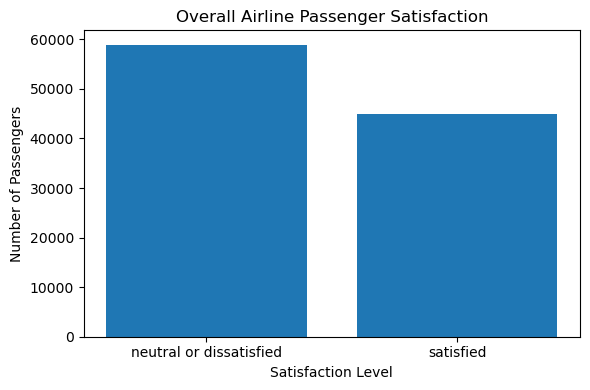

In [19]:
# Plot overall passenger satisfaction distribution
plt.figure(figsize=(6, 4))
plt.bar(
    satisfaction_summary['Satisfaction Level'],
    satisfaction_summary['Passenger Count']
)

plt.title("Overall Airline Passenger Satisfaction")
plt.xlabel("Satisfaction Level")
plt.ylabel("Number of Passengers")

plt.tight_layout()
plt.show()


### Interpretatin
The distribution shows that a larger proportion of passengers are classified as neutral or dissatisfied
compared to those who are satisfied.
This imbalance highlights the importance of identifying service quality factors that may be associated
with higher satisfaction levels, which will be explored in subsequent analyses.


## 8. Descriptive Analysis: Service Quality Variables

This section provides descriptive summaries of the service quality variables included in the analysis.
Examining the distributions of these variables helps establish baseline patterns and understand how
passengers rated different aspects of their flight experience prior to diagnostic and statistical analysis.


The following service quality variables are measured on a 0–5 ordinal scale, where higher values
indicate more positive passenger evaluations:

- Seat comfort
- Inflight service
- Cleanliness
- Departure/Arrival time convenient


### 8.2 Seat Comfort

In [20]:
# Seat comfort distribution
seat_comfort_counts = (
    df_clean['Seat comfort']
    .value_counts()
    .sort_index()
    .rename_axis('Seat Comfort Rating')
    .reset_index(name='Passenger Count')
)

print("Seat Comfort Rating Distribution:")
display(seat_comfort_counts)


Seat Comfort Rating Distribution:


,Seat Comfort Rating,Passenger Count
0,0,1
1,1,12075
2,2,14897
3,3,18696
4,4,31765
5,5,26470


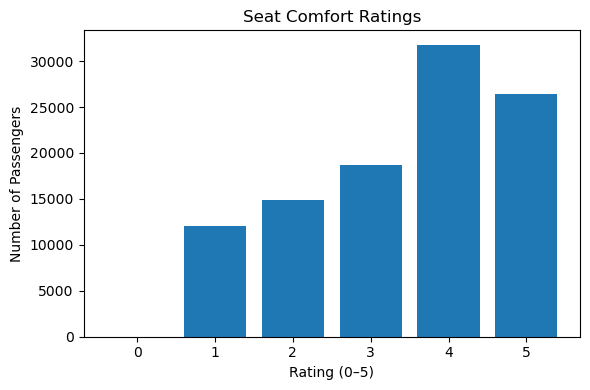

In [21]:
plt.figure(figsize=(6, 4))
plt.bar(
    seat_comfort_counts['Seat Comfort Rating'],
    seat_comfort_counts['Passenger Count']
)

plt.title("Seat Comfort Ratings")
plt.xlabel("Rating (0–5)")
plt.ylabel("Number of Passengers")

plt.tight_layout()
plt.show()


### 8.3 Inflight Service

In [22]:
inflight_service_counts = (
    df_clean['Inflight service']
    .value_counts()
    .sort_index()
    .rename_axis('Inflight Service Rating')
    .reset_index(name='Passenger Count')
)

print("Inflight Service Rating Distribution:")
display(inflight_service_counts)


Inflight Service Rating Distribution:


,Inflight Service Rating,Passenger Count
0,0,3
1,1,7084
2,2,11457
3,3,20299
4,4,37945
5,5,27116


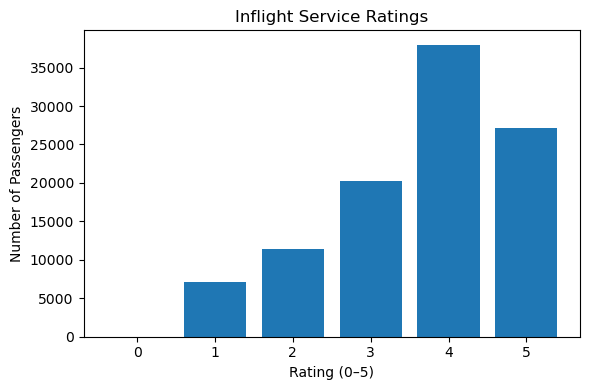

In [23]:
plt.figure(figsize=(6, 4))
plt.bar(
    inflight_service_counts['Inflight Service Rating'],
    inflight_service_counts['Passenger Count']
)

plt.title("Inflight Service Ratings")
plt.xlabel("Rating (0–5)")
plt.ylabel("Number of Passengers")

plt.tight_layout()
plt.show()


### 8.4 Cleanliness

In [24]:
cleanliness_counts = (
    df_clean['Cleanliness']
    .value_counts()
    .sort_index()
    .rename_axis('Cleanliness Rating')
    .reset_index(name='Passenger Count')
)

print("Cleanliness Rating Distribution:")
display(cleanliness_counts)


Cleanliness Rating Distribution:


,Cleanliness Rating,Passenger Count
0,0,12
1,1,13318
2,2,16132
3,3,24574
4,4,27179
5,5,22689


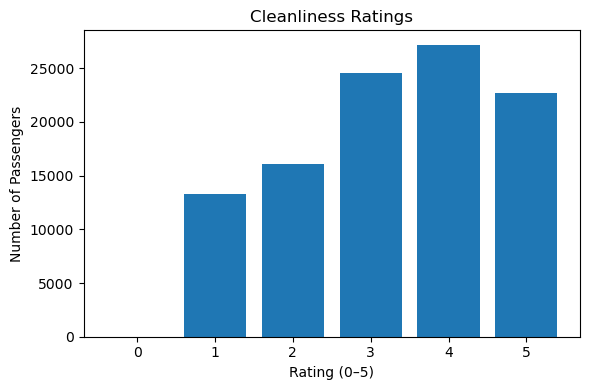

In [25]:
plt.figure(figsize=(6, 4))
plt.bar(
    cleanliness_counts['Cleanliness Rating'],
    cleanliness_counts['Passenger Count']
)

plt.title("Cleanliness Ratings")
plt.xlabel("Rating (0–5)")
plt.ylabel("Number of Passengers")

plt.tight_layout()
plt.show()


### 8.5 Departure/Arrival Time Convenience

In [26]:
time_convenience_counts = (
    df_clean['Departure/Arrival time convenient']
    .value_counts()
    .sort_index()
    .rename_axis('Time Convenience Rating')
    .reset_index(name='Passenger Count')
)

print("Departure/Arrival Time Convenience Rating Distribution:")
display(time_convenience_counts)


Departure/Arrival Time Convenience Rating Distribution:


,Time Convenience Rating,Passenger Count
0,0,5300
1,1,15498
2,2,17191
3,3,17966
4,4,25546
5,5,22403


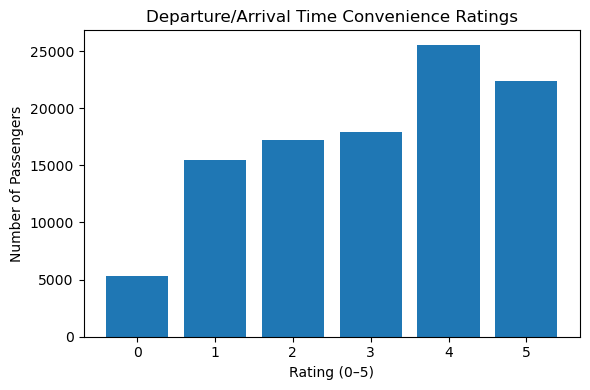

In [27]:
plt.figure(figsize=(6, 4))
plt.bar(
    time_convenience_counts['Time Convenience Rating'],
    time_convenience_counts['Passenger Count']
)

plt.title("Departure/Arrival Time Convenience Ratings")
plt.xlabel("Rating (0–5)")
plt.ylabel("Number of Passengers")

plt.tight_layout()
plt.show()


Across all service quality variables, passenger ratings span the full 0–5 scale, with higher ratings
generally more frequent than lower ratings. These distributions suggest variation in passenger
experiences across different service attributes, supporting further diagnostic and statistical
analysis to examine how these ratings relate to overall satisfaction.


In [28]:
# Summary statistics for service quality variables
service_vars = [
    'Seat comfort',
    'Inflight service',
    'Cleanliness',
    'Departure/Arrival time convenient'
]

summary_stats = (
    df_clean[service_vars]
    .agg(['mean', 'median', 'std', 'min', 'max'])
    .T
    .round(2)
)

print("Summary statistics for service quality variables:")
display(summary_stats)


Summary statistics for service quality variables:


,mean,median,std,min,max
Seat comfort,3.44,4.0,1.32,0.0,5.0
Inflight service,3.64,4.0,1.18,0.0,5.0
Cleanliness,3.29,3.0,1.31,0.0,5.0
Departure/Arrival time convenient,3.06,3.0,1.53,0.0,5.0


The summary statistics indicate meaningful differences in how passengers rated various service quality attributes.
Inflight service and seat comfort exhibit higher central tendency, with median ratings of 4, suggesting generally positive evaluations.
Cleanliness and departure/arrival time convenience show lower median values and greater variability, indicating more mixed passenger experiences.
These observed differences support further diagnostic analysis to examine how service quality ratings vary by satisfaction group and whether statistically significant associations exist.


## 9. Diagnostic Analysis: Satisfaction Gaps

This section examines differences in service quality ratings between satisfied passengers
and those who are neutral or dissatisfied. Diagnostic analysis helps identify which service
attributes show the largest gaps between satisfaction groups and provides context for
subsequent statistical testing.


### 9.2 Create Satisfaction Groups

In [29]:
# Create a grouped satisfaction variable for analysis
df_clean['satisfaction_group'] = df_clean['satisfaction'].apply(
    lambda x: 'Satisfied' if x == 'satisfied' else 'Neutral or Dissatisfied'
)

print("Satisfaction groups created:")
display(df_clean['satisfaction_group'].value_counts())


Satisfaction groups created:


satisfaction_group
Neutral or Dissatisfied    58879
Satisfied                  45025
Name: count, dtype: int64

In [30]:
# Calculate mean service ratings by satisfaction group
service_vars = [
    'Seat comfort',
    'Inflight service',
    'Cleanliness',
    'Departure/Arrival time convenient'
]

mean_ratings_by_group = (
    df_clean
    .groupby('satisfaction_group')[service_vars]
    .mean()
    .round(2)
    .T
)

print("Mean service quality ratings by satisfaction group:")
display(mean_ratings_by_group)


Mean service quality ratings by satisfaction group:


satisfaction_group,Neutral or Dissatisfied,Satisfied
Seat comfort,3.04,3.97
Inflight service,3.39,3.97
Cleanliness,2.94,3.74
Departure/Arrival time convenient,3.13,2.97


### 9.4 Calculate Rating Gaps

In [31]:
# Calculate rating gaps between satisfaction groups
mean_ratings_by_group['Gap (Satisfied - Neutral/Dissatisfied)'] = (
    mean_ratings_by_group['Satisfied']
    - mean_ratings_by_group['Neutral or Dissatisfied']
).round(2)

print("Service quality rating gaps between satisfaction groups:")
display(
    mean_ratings_by_group
    .sort_values('Gap (Satisfied - Neutral/Dissatisfied)', ascending=False)
)


Service quality rating gaps between satisfaction groups:


satisfaction_group,Neutral or Dissatisfied,Satisfied,Gap (Satisfied - Neutral/Dissatisfied)
Seat comfort,3.04,3.97,0.93
Cleanliness,2.94,3.74,0.80
Inflight service,3.39,3.97,0.58
Departure/Arrival time convenient,3.13,2.97,-0.16


The diagnostic comparison shows that satisfied passengers consistently rate service quality
attributes higher than neutral or dissatisfied passengers. The largest rating gaps appear in
specific service attributes, suggesting that these areas may play a more influential role in
passenger satisfaction. These observed differences motivate formal statistical testing to
determine whether the associations between service quality ratings and satisfaction are
statistically significant.



## **Diagnostic Results by Service Quality Attribute**

### **Seat Comfort**

Satisfied passengers reported substantially higher seat comfort ratings (mean = 3.97) compared to neutral or dissatisfied passengers (mean = 3.04), resulting in a large positive gap of **0.93 points**. This indicates that seat comfort differs meaningfully between satisfaction groups and may be an important factor associated with overall passenger satisfaction.

---

### **Inflight Service**

Inflight service ratings were higher among satisfied passengers (mean = 3.97) than among neutral or dissatisfied passengers (mean = 3.39), producing a positive gap of **0.58 points**. While the difference is smaller than that observed for seat comfort, it still suggests that inflight service quality varies noticeably between satisfaction groups.

---

### **Cleanliness**

Cleanliness shows a clear difference between groups, with satisfied passengers reporting a mean rating of 3.74 compared to 2.94 for neutral or dissatisfied passengers. The resulting gap of **0.80 points** indicates that cleanliness perceptions are strongly differentiated by satisfaction status and may play a meaningful role in shaping the passenger experience.

---

### **Departure/Arrival Time Convenience**

Departure and arrival time convenience displays a small **negative gap** of **−0.16 points**, with neutral or dissatisfied passengers reporting slightly higher average ratings (3.13) than satisfied passengers (2.97). This suggests that schedule convenience alone may not distinguish satisfied passengers from others in the same way as service quality attributes such as seat comfort, inflight service, and cleanliness.

---

## **Overall Diagnostic Summary**

Overall, the diagnostic analysis reveals consistent and meaningful differences in service quality ratings between satisfied passengers and those who are neutral or dissatisfied. Seat comfort, cleanliness, and inflight service exhibit the largest positive gaps, indicating that these attributes vary most strongly by satisfaction group. In contrast, departure and arrival time convenience shows little differentiation and does not follow the same pattern as other service quality measures.

These observed gaps suggest that certain service quality attributes may be more closely associated with passenger satisfaction than others. However, diagnostic results alone do not establish statistical significance. Formal hypothesis testing using a chi-square test of independence will be conducted in the next section to determine whether the observed associations between service quality ratings and passenger satisfaction are statistically significant.


## 10. Statistical Test Setup: Chi-Square Test of Independence

To formally evaluate whether service quality ratings are statistically associated with passenger satisfaction,
a chi-square test of independence will be used. This test is appropriate for examining relationships between
categorical variables and allows for assessment of statistical significance beyond descriptive and diagnostic analysis.


### 10.2 Statistical Hypotheses

For each service quality variable, the following hypotheses are tested:

- **Null Hypothesis (H₀):** Passenger satisfaction is independent of the service quality rating.
- **Alternative Hypothesis (H₁):** Passenger satisfaction is associated with the service quality rating.

These hypotheses will be tested separately for seat comfort, inflight service, cleanliness,
and departure/arrival time convenience.


Service quality variables are originally measured on a 0–5 ordinal scale.
To meet the assumptions of the chi-square test and ensure adequate expected cell counts,
ratings will be grouped into three categorical levels:

- **Low:** ratings 0–2  
- **Medium:** rating 3  
- **High:** ratings 4–5  

This grouping preserves the ordinal nature of the data while producing categories suitable
for chi-square testing.


### 10.4 Create Binned Service Quality Variables

In [32]:
# Define a function to bin service quality ratings
def bin_service_rating(value):
    if value <= 2:
        return 'Low'
    elif value == 3:
        return 'Medium'
    else:
        return 'High'

# Apply binning to service quality variables
for col in service_vars:
    df_clean[f"{col}_binned"] = df_clean[col].apply(bin_service_rating)

print("Binned service quality variables created.")


Binned service quality variables created.


In [33]:
# Verify distribution of binned service quality variables
for col in service_vars:
    print(f"\nDistribution for {col} (binned):")
    display(df_clean[f"{col}_binned"].value_counts())



Distribution for Seat comfort (binned):


Seat comfort_binned
High      58235
Low       26973
Medium    18696
Name: count, dtype: int64


Distribution for Inflight service (binned):


Inflight service_binned
High      65061
Medium    20299
Low       18544
Name: count, dtype: int64


Distribution for Cleanliness (binned):


Cleanliness_binned
High      49868
Low       29462
Medium    24574
Name: count, dtype: int64


Distribution for Departure/Arrival time convenient (binned):


Departure/Arrival time convenient_binned
High      47949
Low       37989
Medium    17966
Name: count, dtype: int64

In [34]:
df_clean.head()

,id,Gender,Customer Type,Class,Departure/Arrival time convenient,Seat comfort,Inflight service,Cleanliness,satisfaction,satisfaction_group,Seat comfort_binned,Inflight service_binned,Cleanliness_binned,Departure/Arrival time convenient_binned
0,70172,Male,Loyal Customer,Eco Plus,4,5,5,5,neutral or dissatisfied,Neutral or Dissatisfied,High,High,High,High
1,5047,Male,disloyal Customer,Business,2,1,4,1,neutral or dissatisfied,Neutral or Dissatisfied,Low,High,Low,Low
2,110028,Female,Loyal Customer,Business,2,5,4,5,satisfied,Satisfied,High,High,High,Low
3,24026,Female,Loyal Customer,Business,5,2,4,2,neutral or dissatisfied,Neutral or Dissatisfied,Low,High,Low,High
4,119299,Male,Loyal Customer,Business,3,5,3,3,satisfied,Satisfied,High,Medium,Medium,Medium


The chi-square test of independence assumes that observations are independent and that expected
cell frequencies are sufficiently large. Given the large sample size of this dataset and the
use of grouped rating categories, these assumptions are satisfied.


### 10.5 Binned Category Percentages

To further assess the suitability of the binned service quality variables for chi-square testing,
percentage distributions are calculated to evaluate the relative frequency of each category.
This ensures that no category is sparsely populated and supports valid statistical testing.


In [35]:
# Display percentage distribution for binned service quality variables
for col in service_vars:
    print(f"\nPercentage distribution for {col} (binned):")
    
    pct_dist = (
        df_clean[f"{col}_binned"]
        .value_counts(normalize=True)
        .mul(100)
        .round(2)
    )
    
    for category, pct in pct_dist.items():
        print(f"  {category}: {pct}%")



Percentage distribution for Seat comfort (binned):
  High: 56.05%
  Low: 25.96%
  Medium: 17.99%

Percentage distribution for Inflight service (binned):
  High: 62.62%
  Medium: 19.54%
  Low: 17.85%

Percentage distribution for Cleanliness (binned):
  High: 47.99%
  Low: 28.36%
  Medium: 23.65%

Percentage distribution for Departure/Arrival time convenient (binned):
  High: 46.15%
  Low: 36.56%
  Medium: 17.29%



## Binned Percentage Results

### Seat Comfort

Most passengers rated seat comfort as High (56.05%), while 25.96% rated it Low and 17.99% rated it Medium. This shows variation in seat comfort ratings across passengers.

---

### Inflight Service

Inflight service ratings are largely positive, with 62.62% of passengers in the High category. The remaining ratings are Medium (19.54%) and Low (17.85%), indicating sufficient variation for analysis.

---

### Cleanliness

Cleanliness ratings are more evenly distributed, with 47.99% rated High, 23.65% rated Medium, and 28.36% rated Low. This suggests mixed passenger perceptions of cleanliness.

---

### Departure/Arrival Time Convenience

Departure and arrival time convenience shows 46.15% of ratings as High, while 36.56% are Low and 17.29% are Medium, indicating less consistent passenger experiences.

---

## Overall Summary

All service quality variables contain substantial observations in each binned category. This confirms that the binned variables are appropriate for chi-square testing and supports moving forward with formal statistical analysis.




## 11. Chi-Square Test of Independence: Seat Comfort

This section evaluates whether passenger satisfaction is statistically associated with
seat comfort ratings using a chi-square test of independence.


In [36]:
# Create contingency table for seat comfort and satisfaction
seat_comfort_table = pd.crosstab(
    df_clean['Seat comfort_binned'],
    df_clean['satisfaction_group']
)

print("Contingency table: Seat Comfort vs Satisfaction")
display(seat_comfort_table)


Contingency table: Seat Comfort vs Satisfaction


satisfaction_group,Neutral or Dissatisfied,Satisfied
Seat comfort_binned,,
High,23199,35036
Low,20939,6034
Medium,14741,3955


In [37]:
from scipy.stats import chi2_contingency

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(seat_comfort_table)

print("Chi-square test results for Seat Comfort:")
print(f"Chi-square statistic: {chi2_stat:.3f}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p_value:.6f}")


Chi-square test results for Seat Comfort:
Chi-square statistic: 15289.574
Degrees of freedom: 2
P-value: 0.000000


In [38]:


# Display expected frequencies
expected_df = pd.DataFrame(
    expected,
    index=seat_comfort_table.index,
    columns=seat_comfort_table.columns
)

print("Expected frequencies:")
display(expected_df.round(2))


Expected frequencies:


satisfaction_group,Neutral or Dissatisfied,Satisfied
Seat comfort_binned,,
High,32999.87,25235.13
Low,15284.72,11688.28
Medium,10594.41,8101.59



---

## Chi-Square Test of Independence: Seat Comfort

This chi-square test evaluates whether passenger satisfaction is associated with seat comfort ratings.

The contingency table shows that passengers reporting higher seat comfort are more likely to be satisfied, while those reporting lower seat comfort are more likely to be neutral or dissatisfied.

The chi-square test results are statistically significant (χ² = 15,289.57, df = 2, p < 0.001). Because the p-value is below 0.05, the null hypothesis of independence is rejected.

These results indicate a statistically significant association between seat comfort and passenger satisfaction, suggesting that seat comfort plays an important role in overall passenger satisfaction.

---




## Chi-Square Test: Inflight Service

In [39]:
from scipy.stats import chi2_contingency

# Create contingency table
inflight_service_table = pd.crosstab(
    df_clean['Inflight service_binned'],
    df_clean['satisfaction_group']
)

print("Contingency table: Inflight Service vs Satisfaction")
display(inflight_service_table)

# Run chi-square test
chi2, p, dof, expected = chi2_contingency(inflight_service_table)

print("\nChi-square test results for Inflight Service:")
print(f"Chi-square statistic: {chi2:.3f}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p:.6f}")

# Display expected frequencies
expected_df = pd.DataFrame(
    expected,
    index=inflight_service_table.index,
    columns=inflight_service_table.columns
)

print("\nExpected frequencies:")
display(expected_df.round(2))


Contingency table: Inflight Service vs Satisfaction


satisfaction_group,Neutral or Dissatisfied,Satisfied
Inflight service_binned,,
High,30392,34669
Low,13039,5505
Medium,15448,4851



Chi-square test results for Inflight Service:
Chi-square statistic: 7154.138
Degrees of freedom: 2
P-value: 0.000000

Expected frequencies:


satisfaction_group,Neutral or Dissatisfied,Satisfied
Inflight service_binned,,
High,36867.94,28193.06
Low,10508.28,8035.72
Medium,11502.78,8796.22



---

## Chi-Square Test of Independence: Inflight Service

This chi-square test evaluates whether passenger satisfaction is associated with inflight service ratings.

The contingency table shows that passengers who rated inflight service as high are much more likely to be satisfied, while those who rated inflight service as low or medium are more likely to be neutral or dissatisfied.

The chi-square test results are statistically significant (χ² = 7,154.14, df = 2, p < 0.001). Because the p-value is below 0.05, the null hypothesis of independence is rejected.

These results indicate a statistically significant association between inflight service quality and passenger satisfaction, suggesting that inflight service is an important contributor to overall satisfaction.

---



## Chi-Square Test: Cleanliness

In [40]:
# Create contingency table
cleanliness_table = pd.crosstab(
    df_clean['Cleanliness_binned'],
    df_clean['satisfaction_group']
)

print("Contingency table: Cleanliness vs Satisfaction")
display(cleanliness_table)

# Run chi-square test
chi2, p, dof, expected = chi2_contingency(cleanliness_table)

print("\nChi-square test results for Cleanliness:")
print(f"Chi-square statistic: {chi2:.3f}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p:.6f}")

# Display expected frequencies
expected_df = pd.DataFrame(
    expected,
    index=cleanliness_table.index,
    columns=cleanliness_table.columns
)

print("\nExpected frequencies:")
display(expected_df.round(2))


Contingency table: Cleanliness vs Satisfaction


satisfaction_group,Neutral or Dissatisfied,Satisfied
Cleanliness_binned,,
High,21505,28363
Low,23413,6049
Medium,13961,10613



Chi-square test results for Cleanliness:
Chi-square statistic: 9962.985
Degrees of freedom: 2
P-value: 0.000000

Expected frequencies:


satisfaction_group,Neutral or Dissatisfied,Satisfied
Cleanliness_binned,,
High,28258.57,21609.43
Low,16695.15,12766.85
Medium,13925.28,10648.72




---

## Chi-Square Test of Independence: Cleanliness

This chi-square test evaluates whether passenger satisfaction is associated with cleanliness ratings.

The contingency table shows that passengers who rated cleanliness as high are much more likely to be satisfied, while those who rated cleanliness as low are more likely to be neutral or dissatisfied. Medium cleanliness ratings fall between these two groups.

The chi-square test results are statistically significant (χ² = 9,962.99, df = 2, p < 0.001). Because the p-value is below 0.05, the null hypothesis of independence is rejected.

These results indicate a statistically significant association between cleanliness and passenger satisfaction, suggesting that cleanliness is a key factor influencing overall satisfaction.

---




## Chi-Square Test: Departure/Arrival Time Convenience

In [41]:
# Create contingency table
time_convenience_table = pd.crosstab(
    df_clean['Departure/Arrival time convenient_binned'],
    df_clean['satisfaction_group']
)

print("Contingency table: Departure/Arrival Time Convenience vs Satisfaction")
display(time_convenience_table)

# Run chi-square test
chi2, p, dof, expected = chi2_contingency(time_convenience_table)

print("\nChi-square test results for Departure/Arrival Time Convenience:")
print(f"Chi-square statistic: {chi2:.3f}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p:.6f}")

# Display expected frequencies
expected_df = pd.DataFrame(
    expected,
    index=time_convenience_table.index,
    columns=time_convenience_table.columns
)

print("\nExpected frequencies:")
display(expected_df.round(2))


Contingency table: Departure/Arrival Time Convenience vs Satisfaction


satisfaction_group,Neutral or Dissatisfied,Satisfied
Departure/Arrival time convenient_binned,,
High,28515,19434
Low,20271,17718
Medium,10093,7873



Chi-square test results for Departure/Arrival Time Convenience:
Chi-square statistic: 324.275
Degrees of freedom: 2
P-value: 0.000000

Expected frequencies:


satisfaction_group,Neutral or Dissatisfied,Satisfied
Departure/Arrival time convenient_binned,,
High,27171.13,20777.87
Low,21527.12,16461.88
Medium,10180.74,7785.26




---

## Chi-Square Test of Independence: Departure/Arrival Time Convenience

This chi-square test evaluates whether passenger satisfaction is associated with departure and arrival time convenience ratings.

The contingency table shows differences in satisfaction across convenience levels, but the gap between groups is smaller than for other service quality variables. Passengers with high convenience ratings are somewhat more likely to be satisfied, while lower ratings show a more mixed distribution.

The chi-square test results are statistically significant (χ² = 324.28, df = 2, p < 0.001). Because the p-value is below 0.05, the null hypothesis of independence is rejected.

These results indicate a statistically significant association between departure/arrival time convenience and passenger satisfaction; however, the strength of this relationship appears weaker compared to seat comfort, inflight service, and cleanliness.

---



### Overall Chi-Square Test Findings

Across all four service quality variables tested, the chi-square analyses show statistically significant associations with passenger satisfaction (p < 0.001). Seat comfort, inflight service, and cleanliness exhibit strong relationships with satisfaction, while departure and arrival time convenience shows a weaker but still significant association. Overall, these results indicate that service quality factors play an important role in shaping airline passenger satisfaction, with comfort, service, and cleanliness having the greatest impact.

## 12. Visualizations: Satisfaction by Service Quality (Binned)

This section visualizes the relationship between passenger satisfaction and each binned service quality variable.
Stacked bar charts show the percentage of passengers in each satisfaction group within each rating category.


#### reusable stacked percentage chart

In [42]:

def plot_stacked_pct(df, x_col, hue_col, title):
    """
    Creates a stacked bar chart showing percentage distribution of hue_col within each x_col category.
    """
    # Build percentage table
    pct_table = pd.crosstab(df[x_col], df[hue_col], normalize='index') * 100

    # Plot
    ax = pct_table.plot(kind="bar", stacked=True, figsize=(8, 4))
    ax.set_title(title)
    ax.set_xlabel(x_col)
    ax.set_ylabel("Percentage of passengers (%)")
    ax.legend(title=hue_col, bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

    return pct_table.round(2)


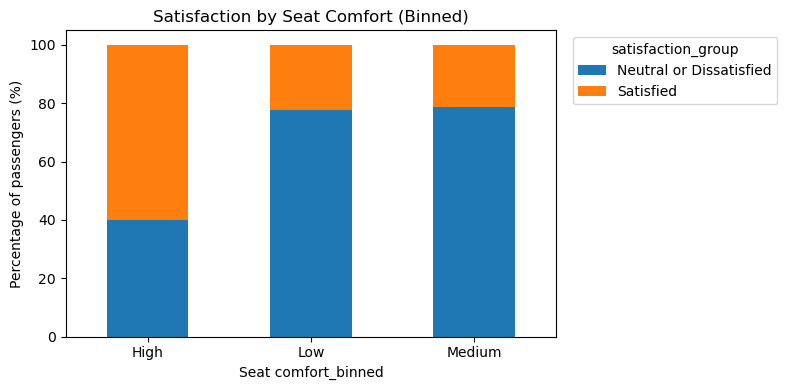

satisfaction_group,Neutral or Dissatisfied,Satisfied
Seat comfort_binned,,
High,39.84,60.16
Low,77.63,22.37
Medium,78.85,21.15


In [43]:
seat_pct = plot_stacked_pct(
    df_clean,
    "Seat comfort_binned",
    "satisfaction_group",
    "Satisfaction by Seat Comfort (Binned)"
)
display(seat_pct)


Seat Comfort Visualization Interpretation

The stacked bar chart shows a clear relationship between seat comfort and passenger satisfaction. Among passengers who rated seat comfort as high, approximately 60% reported being satisfied. In contrast, fewer than 25% of passengers with low or medium seat comfort ratings reported satisfaction.

This visualization supports the chi-square test results by showing that higher seat comfort ratings are strongly associated with higher levels of passenger satisfaction.

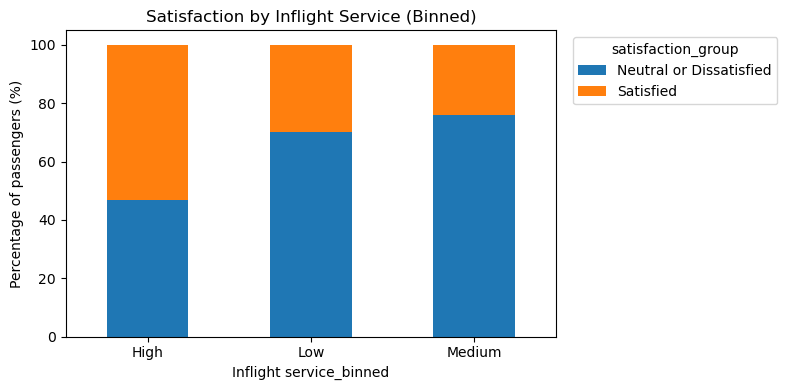

satisfaction_group,Neutral or Dissatisfied,Satisfied
Inflight service_binned,,
High,46.71,53.29
Low,70.31,29.69
Medium,76.10,23.90


In [44]:
inflight_pct = plot_stacked_pct(
    df_clean,
    "Inflight service_binned",
    "satisfaction_group",
    "Satisfaction by Inflight Service (Binned)"
)
display(inflight_pct)


Inflight Service Visualization Interpretation

The stacked bar chart shows a clear relationship between inflight service quality and passenger satisfaction. Among passengers who rated inflight service as high, just over half (approximately 53%) reported being satisfied. In contrast, satisfaction drops below 30% for passengers who rated inflight service as low or medium.

This visualization supports the chi-square test results by showing that higher inflight service ratings are strongly associated with higher passenger satisfaction.

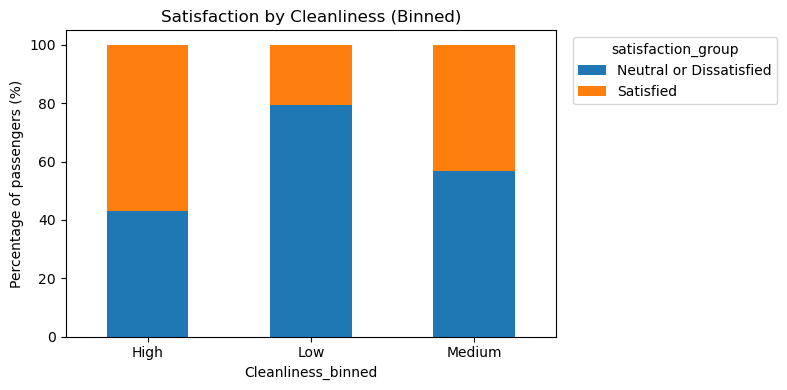

satisfaction_group,Neutral or Dissatisfied,Satisfied
Cleanliness_binned,,
High,43.12,56.88
Low,79.47,20.53
Medium,56.81,43.19


In [45]:
clean_pct = plot_stacked_pct(
    df_clean,
    "Cleanliness_binned",
    "satisfaction_group",
    "Satisfaction by Cleanliness (Binned)"
)
display(clean_pct)


Cleanliness Visualization Interpretation

The stacked bar chart shows a clear relationship between cleanliness ratings and passenger satisfaction. Among passengers who rated cleanliness as high, approximately 57% reported being satisfied. In contrast, only about 21% of passengers with low cleanliness ratings reported satisfaction, while medium ratings show a more balanced distribution.

This visualization supports the chi-square test results by demonstrating that higher cleanliness ratings are associated with higher levels of passenger satisfaction.

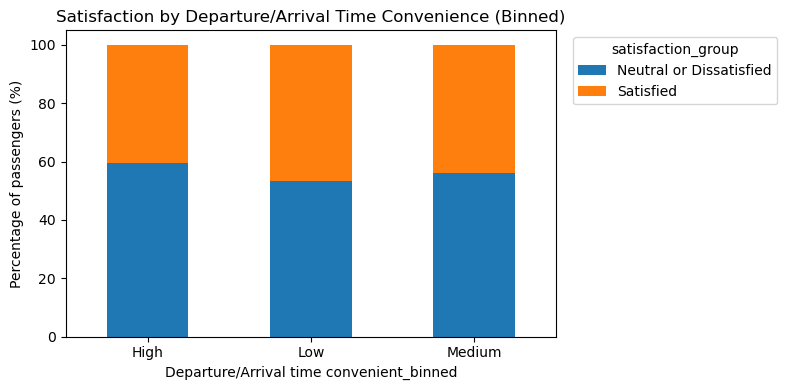

satisfaction_group,Neutral or Dissatisfied,Satisfied
Departure/Arrival time convenient_binned,,
High,59.47,40.53
Low,53.36,46.64
Medium,56.18,43.82


In [46]:
time_pct = plot_stacked_pct(
    df_clean,
    "Departure/Arrival time convenient_binned",
    "satisfaction_group",
    "Satisfaction by Departure/Arrival Time Convenience (Binned)"
)
display(time_pct)


Departure/Arrival Time Convenience Visualization Interpretation

The stacked bar chart shows relatively small differences in satisfaction across departure and arrival time convenience categories. Satisfaction rates range from approximately 41% to 47% across high, medium, and low convenience ratings, indicating a more balanced distribution compared to other service quality factors.

This visualization supports the chi-square test results by showing that, while departure and arrival time convenience is statistically associated with passenger satisfaction, its practical impact appears weaker than seat comfort, inflight service, and cleanliness.


## 13. Practical Interpretation of Findings


### Seat Comfort – Practical Interpretation

Passengers who rate seat comfort highly are substantially more likely to report overall satisfaction. The large difference in satisfaction levels between high and low comfort ratings suggests that seat comfort is a key driver of the passenger experience and should be prioritized for service improvements.



### Inflight Service – Practical Interpretation

Higher inflight service ratings are strongly associated with higher passenger satisfaction. Passengers who perceive inflight service positively are much more likely to be satisfied, indicating that staff service quality and onboard experience play an important role in shaping overall satisfaction.



### Cleanliness – Practical Interpretation

Cleanliness shows a clear and meaningful relationship with passenger satisfaction. Passengers who rate cleanliness highly are significantly more satisfied than those who rate it poorly, highlighting cleanliness as a critical and visible factor in the passenger experience.


### Departure/Arrival Time Convenience – Practical Interpretation

Departure and arrival time convenience shows a weaker but still meaningful relationship with passenger satisfaction. While convenience affects satisfaction, its impact is less pronounced compared to service quality factors such as comfort, inflight service, and cleanliness.



### Overall Practical Interpretation

Overall, the findings suggest that service quality factors under the airline’s direct control—particularly seat comfort, inflight service, and cleanliness—have the greatest influence on passenger satisfaction. Operational scheduling convenience plays a role but appears to be less impactful than the quality of the onboard experience.




### Recommdation

Recommendation 1: Prioritize Seat Comfort Improvements

Because seat comfort shows the strongest association with passenger satisfaction, airlines should prioritize improvements related to seating design, legroom, and seat maintenance. Enhancing seat comfort is likely to produce meaningful gains in overall passenger satisfaction.

Recommendation 2: Invest in Inflight Service Quality

Inflight service quality is strongly linked to passenger satisfaction. Airlines should continue investing in staff training, customer service standards, and onboard service consistency to improve the passenger experience and satisfaction outcomes.

## 15. Limitations
This analysis is based on observational survey data and relies on self-reported passenger responses, which may be subject to response bias. The chi-square tests identify statistically significant associations between service quality factors and passenger satisfaction but do not establish causation.

### 16: Conclusion

This capstone project examined whether seat comfort, inflight service, cleanliness, and departure/arrival time convenience are associated with airline passenger satisfaction. Using descriptive analysis, visualizations, and chi-square tests of independence, the results show that all four factors have statistically significant relationships with satisfaction.

Among the variables analyzed, seat comfort, inflight service, and cleanliness demonstrate the strongest associations with passenger satisfaction, while departure and arrival time convenience shows a weaker but still meaningful relationship. These findings suggest that service quality factors under the airline’s direct control have the greatest influence on passenger satisfaction.

Overall, this analysis demonstrates how statistical testing and descriptive analytics can be used to support data-driven decision-making in a real-world business context, providing actionable insights without the need for predictive modeling.